# TMDB Box Office Predictions 
In this project, we will use supervised machine learning models to predict the box office revenue of hundreds of films

# API Pull 
To retrieve our dataset, we will conduct an API pull from the TMDB website 
https://www.themoviedb.org/

In [1]:
#import dependencies 
import pandas as pd
import numpy as np
from config import api_key
import json
from collections import Counter
from pprint import pprint
import requests
import os 
import csv 

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data2= pd.read_csv('test.csv')

In [4]:
up_to_2019= pd.concat([data, data2])

In [5]:
up_to_2019.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0


Deciding features to know what we want to pull from TMDB API 

Features: film, budget, genres, original_language, popularity, production_companies, 
           release_date, runtime',revenue

Target: Revenue

In [6]:
#Kaggle Dataset Provides us with movie info up until 2019
#to keep project up to date, we will preform API pulls for 2020 and 2021 films 

In [7]:
#The tmdb only allows API pulls for 1 page at a time 
#page 1 url
#we will pull the 1st 10 pages of each year with descending revenue
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc'+'&page=1')

In [8]:
highest_revenue = response.json() # store parsed json response

# uncomment the next line to get a peek at the highest_revenue json structure
# highest_revenue

highest_revenue_films = highest_revenue['results']

In [9]:
# define column names for our new dataframe
columns = ['film', 'budget', 'genres', 'original_language', 'popularity', 'production_companies', 
           'release_date', 'runtime','revenue']

# create dataframe with film and revenue columns
df_2020 = pd.DataFrame(columns=columns)

In [10]:
# for each of the highest revenue films make an api call for that specific movie to return all of our column headers
for film in highest_revenue_films:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2020.loc[len(df_2020)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe    

In [11]:
#page 2
response2 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc'+'&page=2')

In [12]:
two= response2.json()
page_two = two['results']

In [13]:
df_2020_2 = pd.DataFrame(columns=columns)

In [14]:
# for each of the highest revenue films make an api call for that specific movie to return all of our column headers
for film in page_two:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2020_2.loc[len(df_2020_2)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe    

In [15]:
#page 3
response3 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc'+'&page=3')
three= response3.json()
page_three = three['results']

In [16]:
df_2020_3 = pd.DataFrame(columns=columns)

In [17]:
for film in page_three:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2020_3.loc[len(df_2020_3)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 
    

In [18]:
#Page 4
response4 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc'+'&page=4')
four= response4.json()
page_four = four['results']
df_2020_4 = pd.DataFrame(columns=columns)

In [19]:
for film in page_four:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2020_4.loc[len(df_2020_4)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 
    

In [20]:
#page5
response5 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc'+'&page=5')
five= response5.json()
page_five = five['results']
df_2020_5 = pd.DataFrame(columns=columns)

In [21]:
for film in page_five:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2020_5.loc[len(df_2020_5)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 
    

In [22]:
#page6
response6 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc'+'&page=6')
six= response6.json()
page_six = six['results']
df_2020_6 = pd.DataFrame(columns=columns)

In [23]:
for film in page_six:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2020_6.loc[len(df_2020_6)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 
    

In [24]:
#page7
response7 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc'+'&page=7')
seven= response7.json()
page_seven = seven['results']
df_2020_7 = pd.DataFrame(columns=columns)

In [25]:
for film in page_seven:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2020_7.loc[len(df_2020_7)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 
    

In [26]:
#page8
response8 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc'+'&page=8')
eight= response8.json()
page_eight = eight['results']
df_2020_8 = pd.DataFrame(columns=columns)

In [27]:
for film in page_eight:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2020_8.loc[len(df_2020_8)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [28]:
#page9
response9 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc'+'&page=9')
nine= response9.json()
page_nine = nine['results']
df_2020_9 = pd.DataFrame(columns=columns)

In [29]:
for film in page_nine:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2020_9.loc[len(df_2020_9)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [30]:
#page10
response10 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc'+'&page=10')
ten= response10.json()
page_ten = ten['results']
df_2020_10 = pd.DataFrame(columns=columns)

In [31]:
for film in page_ten:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2020_10.loc[len(df_2020_10)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [32]:
#Combine all 10 2020 movie dfs 
Total_2020_Movies= pd.concat([df_2020, df_2020_2, df_2020_3, df_2020_4, df_2020_5, df_2020_6,
          df_2020_7, df_2020_8, df_2020_9, df_2020_10], ignore_index=True, axis=0)

Data for 2021

In [33]:
#page1
response1a = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2021&sort_by=revenue.desc'+'&page=1')
onea= response1a.json()
page_onea = onea['results']
df_2021 = pd.DataFrame(columns=columns)

In [34]:
for film in page_onea:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2021.loc[len(df_2021)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [35]:
#page2
response2a = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2021&sort_by=revenue.desc'+'&page=2')
twoa= response2a.json()
page_twoa = twoa['results']
df_2021_2 = pd.DataFrame(columns=columns)

In [36]:
for film in page_twoa:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2021_2.loc[len(df_2021_2)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [37]:
#page3
response3a = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2021&sort_by=revenue.desc'+'&page=2')
threea= response3a.json()
page_threea = threea['results']
df_2021_3 = pd.DataFrame(columns=columns)

In [38]:
for film in page_threea:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2021_3.loc[len(df_2021_3)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [39]:
#page4
response4a = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2021&sort_by=revenue.desc'+'&page=2')
foura= response4a.json()
page_foura = foura['results']
df_2021_4 = pd.DataFrame(columns=columns)

In [40]:
for film in page_foura:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2021_4.loc[len(df_2021_4)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [41]:
#page5
response5a = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2021&sort_by=revenue.desc'+'&page=2')
fivea= response5a.json()
page_fivea = fivea['results']
df_2021_5 = pd.DataFrame(columns=columns)

In [42]:
for film in page_twoa:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2021_5.loc[len(df_2021_5)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [43]:
#page6
response6a = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2021&sort_by=revenue.desc'+'&page=2')
sixa= response6a.json()
page_sixa = sixa['results']
df_2021_6 = pd.DataFrame(columns=columns)

In [44]:
for film in page_sixa:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2021_6.loc[len(df_2021_6)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [45]:
#page7
response7a = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2021&sort_by=revenue.desc'+'&page=2')
sevena= response7a.json()
page_sevena = sevena['results']
df_2021_7 = pd.DataFrame(columns=columns)

In [46]:
for film in page_sevena:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2021_7.loc[len(df_2021_7)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [47]:
#page8
response8a = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2021&sort_by=revenue.desc'+'&page=2')
eighta= response8a.json()
page_eighta = eighta['results']
df_2021_8 = pd.DataFrame(columns=columns)

In [48]:
for film in page_eighta:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2021_8.loc[len(df_2021_8)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [49]:
#page9
response9a = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2021&sort_by=revenue.desc'+'&page=2')
ninea= response9a.json()
page_ninea = ninea['results']
df_2021_9 = pd.DataFrame(columns=columns)

In [50]:
for film in page_ninea:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2021_9.loc[len(df_2021_9)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [51]:
#page10
response10a = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2021&sort_by=revenue.desc'+'&page=2')
tena= response10a.json()
page_tena = tena['results']
df_2021_10 = pd.DataFrame(columns=columns)

In [52]:
for film in page_tena:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df_2021_10.loc[len(df_2021_10)]=[film['title'],film_revenue['budget'],film_revenue['genres'],
                     film_revenue['original_language'],film_revenue['popularity'],
                     film_revenue['production_companies'],film_revenue['release_date'],film_revenue['runtime'],
                     film_revenue['revenue']] # store title and revenue in our dataframe 

In [53]:
#Combine all 10 2021 movie dfs 
Total_2021_Movies = pd.concat([df_2021, df_2021_2, df_2021_3, df_2021_4, df_2021_5, df_2021_6,
          df_2021_7, df_2021_8, df_2021_9, df_2021_10], ignore_index=True, axis=0)

In [54]:
#View your dataframes
Total_2020_Movies

,film,budget,genres,original_language,popularity,production_companies,release_date,runtime,revenue
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,15800000,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",ja,1169.173,"[{'id': 5887, 'logo_path': '/m6FEqz8rQECnmfjEw...",2020-10-16,117,503063688
1,The Eight Hundred,80000000,"[{'id': 10752, 'name': 'War'}, {'id': 36, 'nam...",zh,17.175,"[{'id': 112270, 'logo_path': None, 'name': 'Be...",2020-08-14,147,460919368
2,Metallica: WorldWired Tour - Live in Mancheste...,0,"[{'id': 10402, 'name': 'Music'}]",en,3.878,[],2020-06-08,150,426900000
3,Bad Boys for Life,90000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",en,84.824,"[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLu...",2020-01-15,124,426505244
4,Tenet,205000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,106.663,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",2020-08-22,150,363129000
...,...,...,...,...,...,...,...,...,...
195,Force of Nature,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,18.887,"[{'id': 290, 'logo_path': '/Q8mw2AOQQc8Qg0uNwL...",2020-07-02,91,215668
196,Two of Us,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",fr,8.225,"[{'id': 11010, 'logo_path': None, 'name': 'Pap...",2020-02-12,99,208723
197,The Predators,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",it,9.487,"[{'id': 2441, 'logo_path': '/7Vutdea75apwXkRyf...",2020-10-22,109,206589
198,Ghosts of War,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,41.626,"[{'id': 46240, 'logo_path': '/8jiwvypPWazxmJcY...",2020-07-03,94,178592


In [55]:
Total_2021_Movies

,film,budget,genres,original_language,popularity,production_companies,release_date,runtime,revenue
0,Spider-Man: No Way Home,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,6855.906,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",2021-12-15,148,1832000000
1,The Battle at Lake Changjin,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",zh,12.254,"[{'id': 159161, 'logo_path': None, 'name': 'Au...",2021-09-30,176,888577720
2,"Hi, Mom",59000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",zh,7.446,"[{'id': 69484, 'logo_path': '/2xtmvbEse87LM7OJ...",2021-02-12,128,822049668
3,No Time to Die,250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,450.564,"[{'id': 7576, 'logo_path': '/oYcUi1byZ312Z3xiz...",2021-09-29,163,774153007
4,F9,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,408.264,"[{'id': 333, 'logo_path': '/5xUJfzPZ8jWJUDzYtI...",2021-05-19,143,721077945
...,...,...,...,...,...,...,...,...,...
195,Halloween Kills,20000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,258.966,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",2021-10-14,105,127000000
196,The King's Man,100000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,3739.757,"[{'id': 5374, 'logo_path': '/iLu169q37KYJR7DAN...",2021-12-22,131,124005195
197,The Addams Family 2,0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,284.103,"[{'id': 21, 'logo_path': '/aOWKh4gkNrfFZ3Ep7n0...",2021-10-01,93,119815153
198,Wrath of Man,40000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,303.146,"[{'id': 14, 'logo_path': '/m6AHu84oZQxvq7n1rsv...",2021-04-22,119,103966489


Importing Kaggle Dataset 
https://www.kaggle.com/c/tmdb-box-office-prediction/data?select=train.csv

In [56]:
up_to_2019

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,7394,NaN,42000000,"[{'id': 53, 'name': 'Thriller'}]",NaN,tt0218922,en,Original Sin,A young man is plunged into a life of subterfu...,9.970359,...,8/3/01,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,This is not a love story - it's a story about ...,Original Sin,"[{'id': 515, 'name': 'women'}, {'id': 572, 'na...","[{'cast_id': 17, 'character': 'Julia Russell/B...","[{'credit_id': '52fe4330c3a36847f80412db', 'de...",NaN
4394,7395,"[{'id': 146534, 'name': 'Without a Paddle Coll...",19000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0364751,en,Without a Paddle,"Three friends, whose lives have been drifting ...",6.046516,...,8/20/04,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The call of the wild, the thrill of adventure....",Without a Paddle,"[{'id': 4959, 'name': 'death of a friend'}, {'...","[{'cast_id': 40, 'character': 'Dan Mott', 'cre...","[{'credit_id': '52fe43b29251416c7501a909', 'de...",NaN
4395,7396,NaN,16000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0084855,en,The Verdict,"Frank Galvin is a down-on-his luck lawyer, red...",9.596883,...,12/8/82,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The doctors want to settle, the Church wants t...",The Verdict,"[{'id': 1680, 'name': 'boston'}, {'id': 6148, ...","[{'cast_id': 1, 'character': 'Frank Galvin', '...","[{'credit_id': '52fe448bc3a368484e028c55', 'de...",NaN
4

In [57]:
up_to_2019 = up_to_2019.drop(columns=['belongs_to_collection', 'id','homepage','imdb_id','overview',
                                      'spoken_languages','status','tagline','original_title','Keywords','cast',
                                     'crew'])

In [58]:
up_to_2019= up_to_2019.drop(columns=['poster_path','production_countries'])

In [59]:
up_to_2019 = up_to_2019[['title','budget','genres','original_language','popularity',
                         'production_companies','release_date','runtime','revenue']]


In [60]:
up_to_2019.rename(columns={'title': 'film'}, inplace=True)

In [61]:
up_to_2019

,film,budget,genres,original_language,popularity,production_companies,release_date,runtime,revenue
0,Hot Tub Time Machine 2,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,12314651.0
1,The Princess Diaries 2: Royal Engagement,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,95149435.0
2,Whiplash,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",10/10/14,105.0,13092000.0
3,Kahaani,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,3/9/12,122.0,16000000.0
4,Marine Boy,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,2/5/09,118.0,3923970.0
...,...,...,...,...,...,...,...,...,...
4393,Original Sin,42000000,"[{'id': 53, 'name': 'Thriller'}]",en,9.970359,"[{'name': 'Intermedia Films', 'id': 763}, {'na...",8/3/01,118.0,NaN
4394,Without a Paddle,19000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,6.046516,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",8/20/04,95.0,NaN
4395,The Verdict,16000000,"[{'id': 18, 'name': 'Drama'}]",en,9.596883,[{'name': 'Twentieth Century Fox Film Corporat...,12/8/82,129.0,NaN
4396,It Follows,2000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,20.359336,"[{'name': 'Northern Lights Films', 'id': 8714}...",2/4/15,100.0,NaN


In [62]:
all_movies= pd.concat([up_to_2019, Total_2020_Movies, Total_2021_Movies], ignore_index=True, axis=0)

In [89]:
all_movies["genres"] = all_movies.genres.astype(str)

In [90]:
all_movies

,film,budget,genres,original_language,popularity,production_companies,release_date,runtime,revenue
0,Hot Tub Time Machine 2,14000000.0,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2015-02-20,93.0,12314651.0
1,The Princess Diaries 2: Royal Engagement,40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",2004-08-06,113.0,95149435.0
2,Whiplash,3300000.0,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",2014-10-10,105.0,13092000.0
3,Kahaani,1200000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,2012-03-09,122.0,16000000.0
4,Marine Boy,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,2009-02-05,118.0,3923970.0
...,...,...,...,...,...,...,...,...,...
7793,Halloween Kills,20000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,258.966000,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",2021-10-14,105.0,127000000.0
7794,The King's Man,100000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,3739.757000,"[{'id': 5374, 'logo_path': '/iLu169q37KYJR7DAN...",2021-12-22,131.0,124005195.0
7795,The Addams Family 2,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,284.103000,"[{'id': 21, 'logo_path': '/aOWKh4gkNrfFZ3Ep7n0...",2021-10-01,93.0,119815153.0
7796,Wrath of Man,40000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,303.146000,"[{'id': 14, 'logo_path': '/m6AHu84oZQxvq7n1rsv...",2021-04-22,119.0,103966489.0


In [158]:
all_movies.to_csv("movie data.csv")

# Machine Learning Data Preprocessing

In [91]:
#import sklearn dependencies 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [92]:
all_movies.shape

(7798, 9)

In [93]:
from numpy import mean
import time
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import re
from scipy.stats import pearsonr
import math
from statistics import median
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [94]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7798 entries, 0 to 7797
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film                  7795 non-null   object        
 1   budget                7798 non-null   float64       
 2   genres                7798 non-null   object        
 3   original_language     7798 non-null   object        
 4   popularity            7798 non-null   float64       
 5   production_companies  7384 non-null   object        
 6   release_date          7797 non-null   datetime64[ns]
 7   runtime               7792 non-null   float64       
 8   revenue               3400 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 548.4+ KB


In [95]:
#converting objects that are currently numeric to float 
#converting release date to datetime
all_movies["budget"] = all_movies.budget.astype(float)
all_movies["runtime"] = all_movies.runtime.astype(float)
all_movies["revenue"] = all_movies.revenue.astype(float)
all_movies["release_date"] = pd.to_datetime(all_movies["release_date"])

In [138]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7798 entries, 0 to 7797
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film                  7795 non-null   object        
 1   budget                7798 non-null   float64       
 2   genres                7798 non-null   object        
 3   original_language     7798 non-null   object        
 4   popularity            7798 non-null   float64       
 5   production_companies  7384 non-null   object        
 6   release_date          7797 non-null   datetime64[ns]
 7   runtime               7792 non-null   float64       
 8   revenue               3400 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 548.4+ KB


In [139]:
def proc_json(string, key):
    try:
        data = eval(string)
        return ",".join([d[key] for d in data])
    except:
        return ''

In [140]:
train.genres = train.genres.apply(lambda x: proc_json(x, 'name'))
test.genres = test.genres.apply(lambda x: proc_json(x, 'name'))

In [141]:
genres = []
for idx, val in train.genres.iteritems():
    gen_list = val.split(',')
    for gen in gen_list:
        if gen == '':
            continue

        if gen not in genres:
            genres.append(gen)

In [142]:
genre_column_names = []
for gen in genres:
    col_name = 'genre_' + gen.replace(' ', '_')
    train[col_name] = train.genres.str.contains(gen).astype('uint8')
    test[col_name] = test.genres.str.contains(gen).astype('uint8')
    genre_column_names.append(col_name)

In [143]:
train.production_companies = train.production_companies.apply(lambda x: proc_json(x, 'name'))
test.production_companies = test.production_companies.apply(lambda x: proc_json(x, 'name'))

In [148]:
prod_companies = []
for idx, val in train.production_companies.iteritems():
    prod_list = val.split(',')
    for prod in prod_list:
        if prod == '':
            continue

        if prod not in prod_companies:
            prod_companies.append(prod)

In [149]:
prod_column_names = []
for prod in prod_companies:
    col_name = 'co_' + prod.replace(' ', '_')
    train[col_name] = train.production_companies.str.contains(prod).astype('uint8')
    test[col_name] = test.production_companies.str.contains(prod).astype('uint8')
    prod_column_names.append(col_name)

C:\Users\gtmor\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [151]:
train = pd.get_dummies(train, columns = ["original_language"])
test = pd.get_dummies(test, columns = ["original_language"])

KeyError: "None of [Index(['original_language'], dtype='object')] are in the [columns]"

In [147]:
train

,film,budget,genres,popularity,production_companies,release_date,runtime,revenue,genre_Comedy,genre_Crime,...,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_uk,original_language_ur,original_language_xx,original_language_zh
2926,Balls of Fury,0.0,"Comedy,Crime",5.325766,"Rogue Pictures,Spyglass Entertainment,Intrepid...",2007-08-29,90.0,41098065.0,1,1,...,0,0,0,0,0,0,0,0,0,0
5502,The Pebble and the Penguin,28000000.0,"Animation,Adventure,Family",2.304986,"Metro-Goldwyn-Mayer (MGM),Don Bluth Productions",1995-04-11,74.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2809,The Swan Princess,35000000.0,Animation,8.910462,Rich Animation Studios,1994-11-18,89.0,9771658.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1025,A Case of You,0.0,"Comedy,Romance",5.819403,"Lagniappe Films,I'm So Sorry Productions",2013-11-06,91.0,4187.0,1,0,...,0,0,0,0,0,0,0,0,0,0
101,A Beautiful Mind,60000000.0,"Drama,Romance",11.936460,"Imagine Entertainment,DreamWorks SKG,Universal...",2001-12-11,135.0,313542341.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,Ondine,12000000.0,"Drama,Romance",4.757269,"Octagon Films,Irish Film Board,Wayfare Enterta...",2009-09-14,111.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,[REC],1500000.0,"Horror,Mystery",8.504511,Filmax,2007-04-10,78.0,30448000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5856,Thor,150000000.0,"Adventure,Fantasy,Action",29.158489,Marvel Studios,2011-04-21,115.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4681,"Oh, God!",0.0,"Fantasy,Comedy",2.660367,Warner Bros.,1977-10-07,98.0,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0


Next we will need to perform a test train split. 
After data is split drop the revenue column from the test data because that will be our target variable in our models

In [152]:
train=all_movies.sample(frac=0.75,random_state=42) #random state is a seed value
test=all_movies.drop(train.index)

In [153]:
y_train = train["revenue"]
X_train = train.drop(columns = ["revenue"])
X_train.head()

,film,budget,genres,original_language,popularity,production_companies,release_date,runtime
2926,Balls of Fury,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",en,5.325766,"[{'name': 'Rogue Pictures', 'id': 134}, {'name...",2007-08-29,90.0
5502,The Pebble and the Penguin,28000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,2.304986,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...",1995-04-11,74.0
2809,The Swan Princess,35000000.0,"[{'id': 16, 'name': 'Animation'}]",en,8.910462,"[{'name': 'Rich Animation Studios', 'id': 4108}]",1994-11-18,89.0
1025,A Case of You,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,5.819403,"[{'name': 'Lagniappe Films', 'id': 14637}, {'n...",2013-11-06,91.0
101,A Beautiful Mind,60000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,11.936460,"[{'name': 'Imagine Entertainment', 'id': 23}, ...",2001-12-11,135.0


In [154]:
#drop Revenue column from TEST df because that will be our target variable
y_test = test["revenue"]
X_test = test.drop(columns = ["revenue"])
X_test.head()

,film,budget,genres,original_language,popularity,production_companies,release_date,runtime
2,Whiplash,3300000.0,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",2014-10-10,105.0
3,Kahaani,1200000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,2012-03-09,122.0
4,Marine Boy,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,2009-02-05,118.0
5,Pinocchio and the Emperor of the Night,8000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,0.743274,NaN,1987-08-06,83.0
9,A Mighty Wind,6000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",en,4.672036,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",2003-04-16,91.0


In [155]:
#take a look at the shape of our data
print ('The train data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print ('---------------------------------------------')
print ('The test data has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The train data has 5848 rows and 9 columns
---------------------------------------------
The test data has 1950 rows and 9 columns


In [156]:
print("Training set missing values:\n", train.isna().sum())
print("\nTest set missing values:\n", test.isna().sum())

Training set missing values:
 film                       2
budget                     0
genres                     0
original_language          0
popularity                 0
production_companies     314
release_date               1
runtime                    5
revenue                 3289
dtype: int64

Test set missing values:
 film                       1
budget                     0
genres                     0
original_language          0
popularity                 0
production_companies     100
release_date               0
runtime                    1
revenue                 1109
dtype: int64


In [157]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'Balls of Fury'

# Data Exploration
In this section we will take a look at our features to see how they may affect our outcome 
When conducting the original API pull, we only pulled key value pairs that we believed to be useful in our analysis. These pairs will be our features in the model. 
To get a better understanding of our variables we will produce box plots and histograms using matplotlib

In [75]:
print("Mean revenue: %.2f" % train.revenue.mean())
print("Median revenue: %.2f" % train.revenue.median())

Mean revenue: 69449605.01
Median revenue: 17555141.00


In [76]:
#fix dtypes for analysis

In [77]:
train['revenue'] = train.revenue.astype(float)

In [78]:
train['budget'] = train.budget.astype(int)
test['budget'] = test.budget.astype(int)

In [79]:
train['runtime'] = train.runtime.astype(float)
test['runtime'] = test.runtime.astype(float)

In [80]:
train.dtypes

film                     object
budget                    int64
genres                   object
original_language        object
popularity              float64
production_companies     object
release_date             object
runtime                 float64
revenue                 float64
dtype: object

In [81]:
#the revenue should not be this small
train.revenue.nsmallest(20)

347      1.0
1754     1.0
1874     1.0
695      2.0
334      3.0
1541     3.0
2117     4.0
1346     5.0
1190     7.0
2582     8.0
2251     8.0
639      8.0
665     10.0
450     12.0
312     12.0
2759    13.0
2399    15.0
150     18.0
2090    18.0
269     20.0
Name: revenue, dtype: float64

/Users/meredithgray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


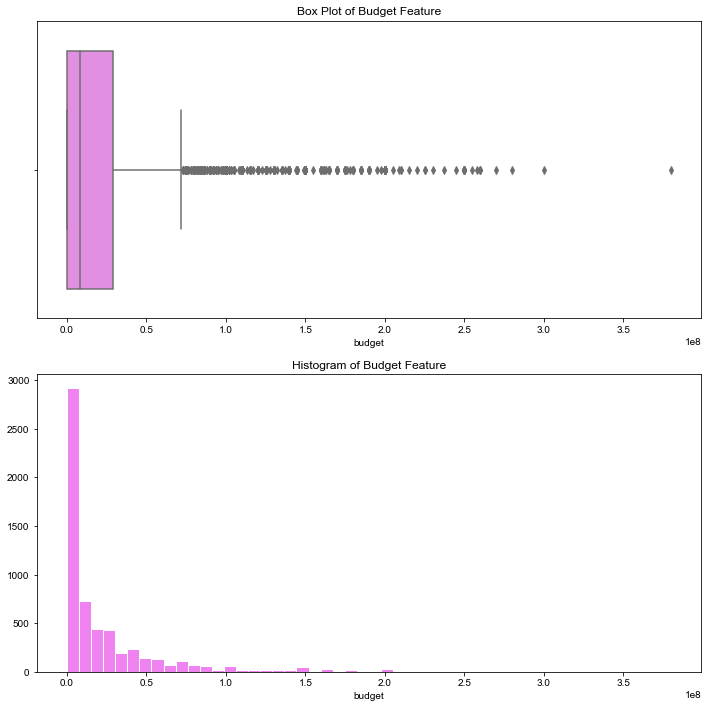

In [82]:
#plotting the data
f, ax = plt.subplots(2, figsize=(10,10))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.budget, ax = ax[0], color='violet')
ax[0].set_title("Box Plot of Budget Feature")
sns.distplot(a=train.budget, kde = False, ax = ax[1], color='violet', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Budget Feature")
f.tight_layout()


In [83]:
print('Movies with budget listed as 0: ',(train.budget == 0).sum())

Movies with budget listed as 0:  1645


The distribution on budget in the training set is heavily skewed right. We have noticed that while there are no movies missing a budget, there are over 1500 movies in our training set that have a budget of 0. We are thinking that this must be inaccurate because almost all films will likely have some kind of budget. We believe that if a movie's budget was not identified, TMDB filled it with a 0. To correct this issue, we have decided to replace the 0 values with median budget. 

In [84]:
median = train.loc[train['budget'] > 0, 'budget'].median()
train["budget_processed"] = train["budget"].mask(train["budget"] == 0, median)
test["budget_processed"] = test["budget"].mask(test["budget"] == 0, median)

/Users/meredithgray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


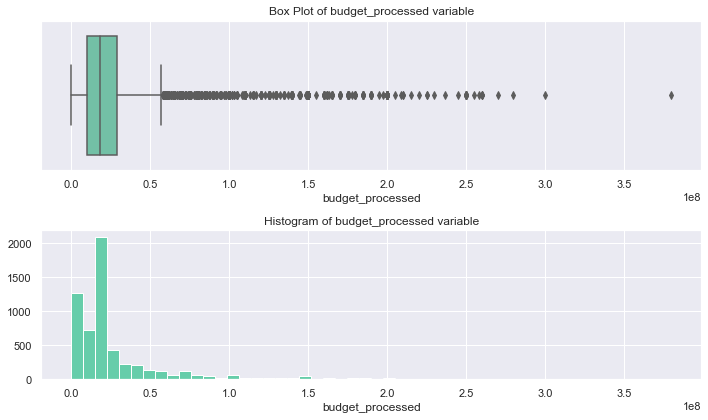

In [85]:
#plotting the data
f, ax = plt.subplots(2, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.budget_processed, ax = ax[0], color='mediumaquamarine')
ax[0].set_title("Box Plot of budget_processed variable")
sns.distplot(a=train.budget_processed, kde = False, ax = ax[1], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of budget_processed variable")
f.tight_layout()

Since there were so many values that are under 10,000 in the budget column, there is a huge cluster of data at this median value. Meaning this was not a good solution

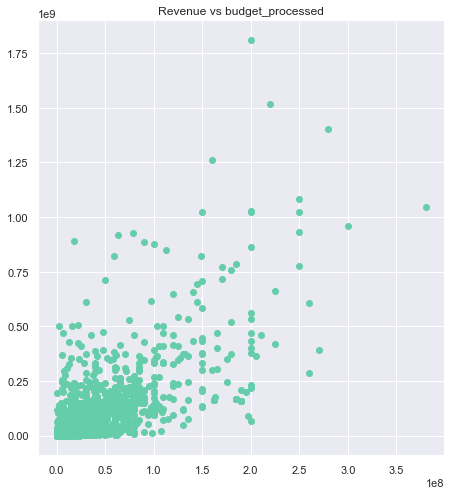

In [86]:
#look at bivariate analysis between revenue and budget
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['budget_processed'], train['revenue'], color='mediumaquamarine')
plt.title('Revenue vs budget_processed');

Pretty Strong Correlation 

In [90]:
train['genres'] = train.genres.astype(str)
test['genres'] = test.genres.astype(str)

In [91]:
#genres
#Different genres may perform differently in the box office
#messy layout of this column, needs to be cleaned 
train['genres_reform'] = train['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))
test['genres_reform'] = test['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

In [92]:
train.dtypes

film                     object
budget                    int64
genres                   object
original_language        object
popularity              float64
production_companies     object
release_date             object
runtime                 float64
revenue                 float64
budget_processed        float64
genres_reform            object
dtype: object

In [93]:
train

,film,budget,genres,original_language,popularity,production_companies,release_date,runtime,revenue,budget_processed,genres_reform
2926,Balls of Fury,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",en,5.325766,"[{'name': 'Rogue Pictures', 'id': 134}, {'name...",8/29/07,90.0,41098065.0,18000000.0,"[Comedy, Crime]"
5502,The Pebble and the Penguin,28000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,2.304986,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...",4/11/95,74.0,NaN,28000000.0,"[Animation, Adventure, Family]"
2809,The Swan Princess,35000000,"[{'id': 16, 'name': 'Animation'}]",en,8.910462,"[{'name': 'Rich Animation Studios', 'id': 4108}]",11/18/94,89.0,9771658.0,35000000.0,[Animation]
1025,A Case of You,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,5.819403,"[{'name': 'Lagniappe Films', 'id': 14637}, {'n...",11/6/13,91.0,4187.0,18000000.0,"[Comedy, Romance]"
101,A Beautiful Mind,60000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,11.936460,"[{'name': 'Imagine Entertainment', 'id': 23}, ...",12/11/01,135.0,313542341.0,60000000.0,"[Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...
5089,Ondine,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,4.757269,"[{'name': 'Octagon Films', 'id': 1266}, {'name...",9/14/09,111.0,NaN,12000000.0,"[Drama, Romance]"
1247,[REC],1500000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",es,8.504511,"[{'name': 'Filmax', 'id': 3631}]",4/10/07,78.0,30448000.0,1500000.0,"[Horror, Mystery]"
5856,Thor,150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,29.158489,"[{'name': 'Marvel Studios', 'id': 420}]",4/21/11,115.0,NaN,150000000.0,"[Adventure, Fantasy, Action]"
4681,"Oh, God!",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",en,2.660367,"[{'name': 'Warner Bros.', 'id': 6194}]",10/7/77,98.0,NaN,18000000.0,"[Fantasy, Comedy]"


One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.